# House Price Prediction:-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset:-

In [2]:
train=pd.read_csv(r'C:\Users\User\Downloads\train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [3]:
test=pd.read_csv(r'C:\Users\User\Downloads\test.csv')
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


In [4]:
hpp=pd.concat([train,test],ignore_index=True)
hpp

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000.0
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000.0
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790.0
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000.0
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,NaN
1456,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,NaN
1457,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,NaN
1458,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,NaN


In [6]:
hpp.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000.0
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000.0
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790.0
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000.0
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000.0
5,1197,60,RL,58.0,14054,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,219210.0
6,561,20,RL,NaN,11341,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,121500.0
7,1041,20,RL,88.0,13125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,1,2006,WD,Normal,155000.0
8,503,20,RL,70.0,9170,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,400,4,2007,WD,Normal,140000.0
9,576,50,RL,80.0,8480,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,COD,Abnorml,118500.0


In [5]:
import math
plt.style.use('ggplot')

In [9]:
hpp.shape

(1460, 81)

In [10]:
hpp.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
hpp.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1168.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,181477.005993
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79105.586863
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Data Cleaning:-

In [17]:
hpp.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice        292
Length: 81, dtype: int64

Above observation shows that many features/columns are having null values in the dataset.

In [134]:
hpp.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object

Observations shows that some columns are object type, rest are integer and float type.

In [135]:
hpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [136]:
hpp.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
hpp_g = hpp.copy()
hpp_g["LotFrontage"].fillna(hpp_g["LotFrontage"].mean(skipna=True), inplace=True)
hpp_g["MasVnrArea"].fillna(hpp_g["MasVnrArea"].mean(skipna=True), inplace=True)
hpp_g["GarageYrBlt"].fillna(hpp_g["GarageYrBlt"].mean(skipna=True), inplace=True)
hpp_g["SalePrice"].fillna(hpp_g["SalePrice"].mean(skipna=True), inplace=True)
hpp_g['Alley'].fillna(hpp_g['Alley'].value_counts().idxmax(), inplace=True)
hpp_g['MasVnrType'].fillna(hpp_g['MasVnrType'].value_counts().idxmax(), inplace=True)
hpp_g['BsmtQual'].fillna(hpp_g['BsmtQual'].value_counts().idxmax(), inplace=True)
hpp_g['BsmtCond'].fillna(hpp_g['BsmtCond'].value_counts().idxmax(), inplace=True)
hpp_g['BsmtExposure'].fillna(hpp_g['BsmtExposure'].value_counts().idxmax(), inplace=True)
hpp_g['BsmtFinType1'].fillna(hpp_g['BsmtFinType1'].value_counts().idxmax(), inplace=True)
hpp_g['BsmtFinType2'].fillna(hpp_g['BsmtFinType2'].value_counts().idxmax(), inplace=True)
hpp_g['Electrical'].fillna(hpp_g['Electrical'].value_counts().idxmax(), inplace=True)
hpp_g['FireplaceQu'].fillna(hpp_g['FireplaceQu'].value_counts().idxmax(), inplace=True)
hpp_g['GarageType'].fillna(hpp_g['GarageType'].value_counts().idxmax(), inplace=True)
hpp_g['GarageFinish'].fillna(hpp_g['GarageFinish'].value_counts().idxmax(), inplace=True)
hpp_g['GarageQual'].fillna(hpp_g['GarageQual'].value_counts().idxmax(), inplace=True)
hpp_g['GarageCond'].fillna(hpp_g['GarageCond'].value_counts().idxmax(), inplace=True)
hpp_g['PoolQC'].fillna(hpp_g['PoolQC'].value_counts().idxmax(), inplace=True)
hpp_g['Fence'].fillna(hpp_g['Fence'].value_counts().idxmax(), inplace=True)
hpp_g['MiscFeature'].fillna(hpp_g['MiscFeature'].value_counts().idxmax(), inplace=True)

In [7]:
hpp_g

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,70.049958,4928,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2007,WD,Normal,128000.000000
1,889,20,RL,95.000000,15865,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,10,2007,WD,Normal,268000.000000
2,793,60,RL,92.000000,9920,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,6,2007,WD,Normal,269790.000000
3,110,20,RL,105.000000,11751,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,1,2010,COD,Normal,190000.000000
4,422,20,RL,70.049958,16635,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,6,2009,WD,Normal,215000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,83,20,RL,78.000000,10206,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,10,2008,WD,Normal,181477.005993
1456,1048,20,RL,57.000000,9245,Pave,Grvl,IR2,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,181477.005993
1457,17,20,RL,70.049958,11241,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,700,3,2010,WD,Normal,181477.005993
1458,523,50,RM,50.000000,5000,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,10,2006,WD,Normal,181477.005993


In [8]:
hpp_g.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [9]:
hpp_g.isnull().values.any()

False

Now, no null values are there.

# EDA and Data Visualization:-

In [143]:
# How expensive are houses?

print('The cheapest house sold for ${:,.0f} and the most expensive for ${:,.0f}'.format(
    hpp_g.SalePrice.min(), hpp_g.SalePrice.max()))

print('The average sales price is ${:,.0f}, while median is ${:,.0f}'.format(
    hpp_g.SalePrice.mean(), hpp_g.SalePrice.median()))

The cheapest house sold for $34,900 and the most expensive for $755,000
The average sales price is $181,477, while median is $181,477


Data Visualization:-

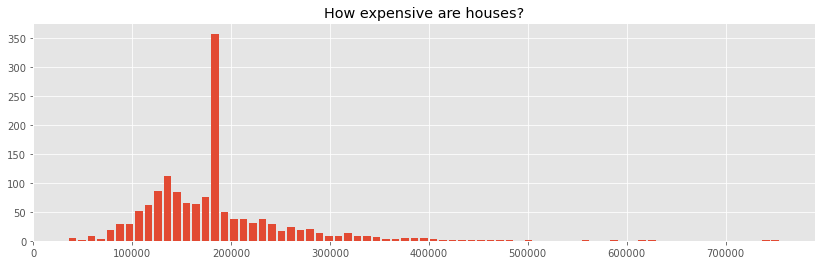

In [144]:
hpp_g.SalePrice.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('How expensive are houses?')
plt.show()

The typical house price in Ames is roughly 150k. Highest House prices is 350k.

In [146]:
# When were the houses built?

print('Oldest house built in {}. Newest house built in {}.'.format(
    hpp_g.YearBuilt.min(), hpp_g.YearBuilt.max()))

Oldest house built in 1872. Newest house built in 2010.


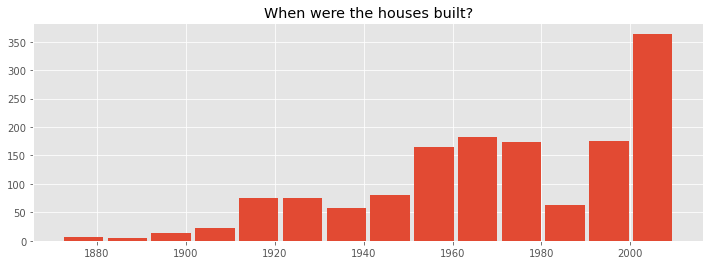

In [147]:
hpp_g.YearBuilt.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('When were the houses built?')
plt.show()

Above graph shows that no much action in the 80s apparently. Looks like majority of houses were built in the 50s and after.

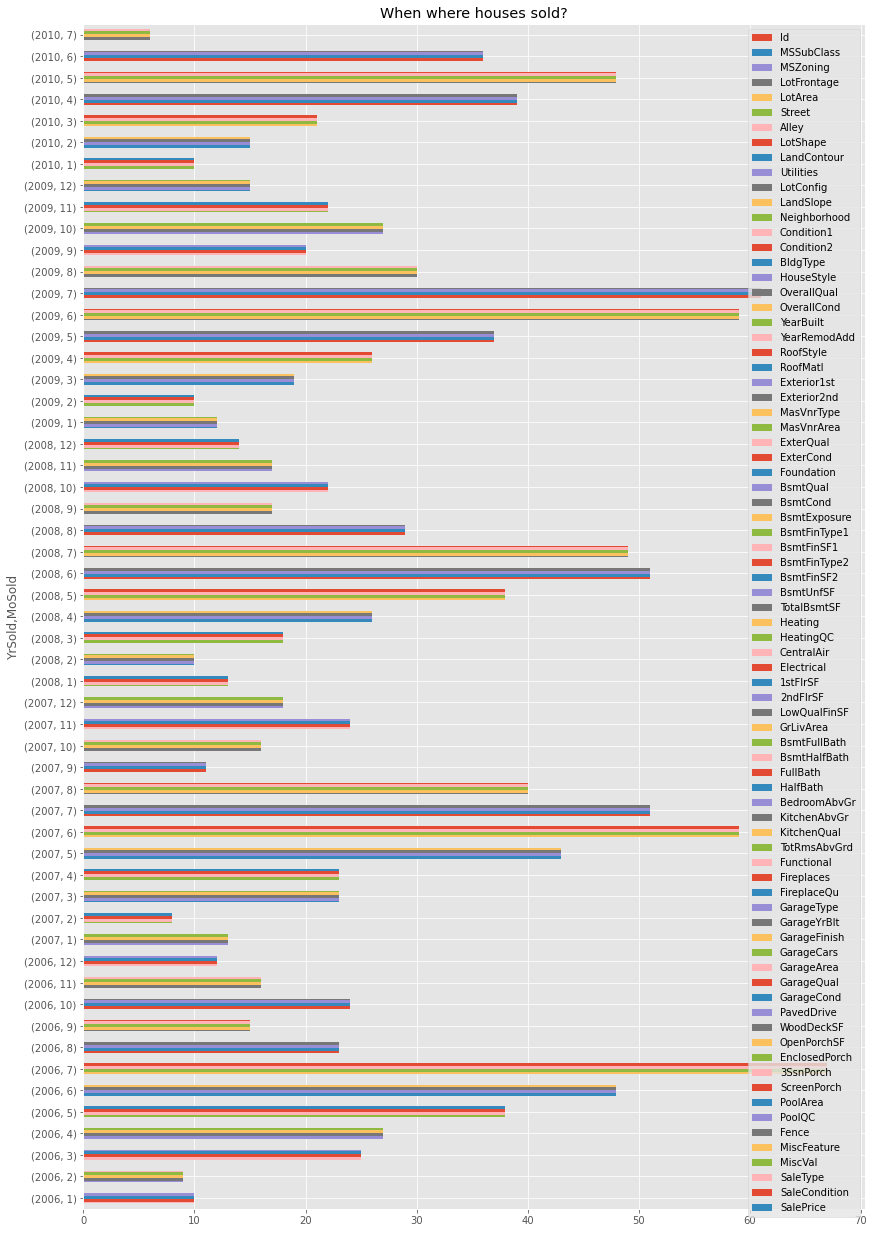

In [148]:
# When where houses sold?

hpp_g.groupby(['YrSold','MoSold']).count().plot(kind='barh', figsize=(14,21.8))
plt.title('When where houses sold?')
plt.show()

We see a strong seasonal pattern in house sales, with peaks in June and July(summer season).

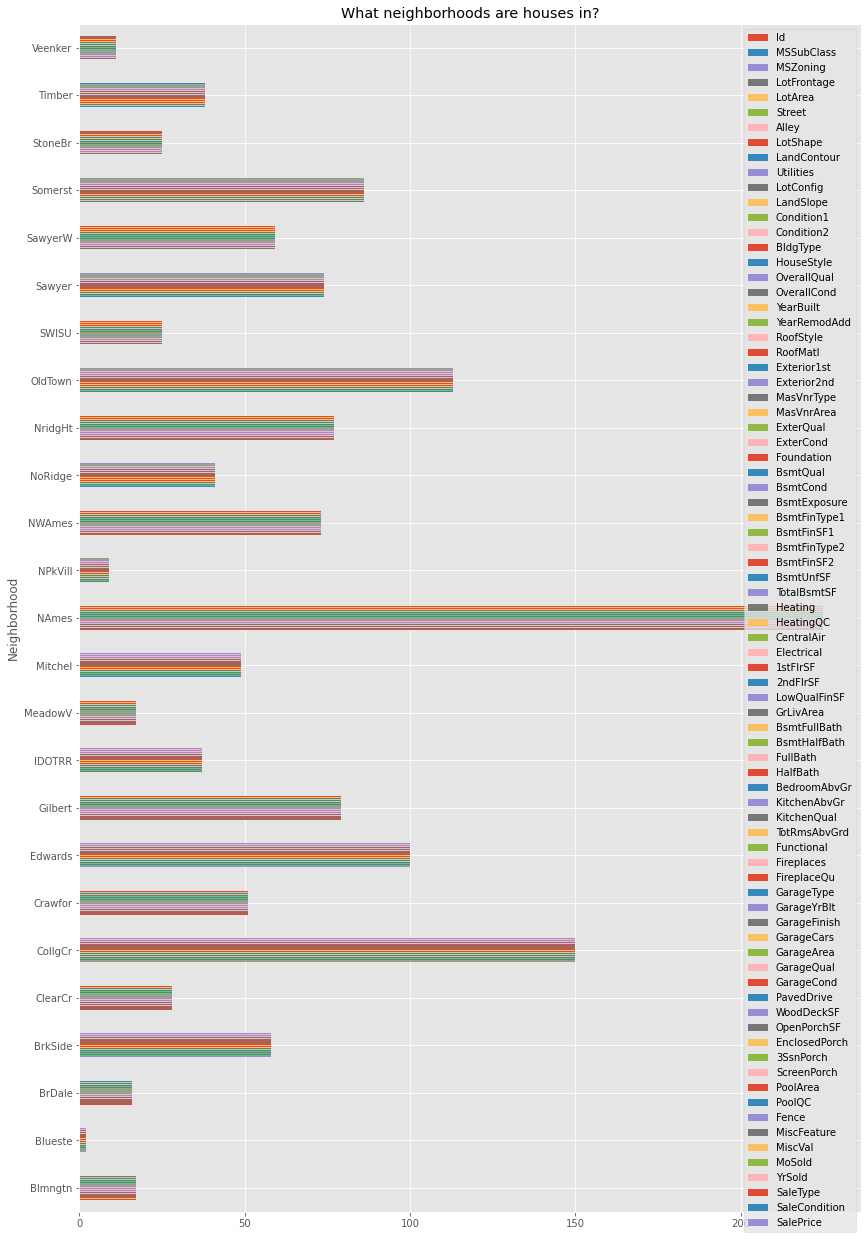

In [149]:
# Where are houses?

hpp_g.groupby('Neighborhood').count().plot(kind='barh', figsize=(14,21.85))
plt.title('What neighborhoods are houses in?')
plt.show()

The location of the house is expected to play a key role in determining the price of the house. Looks like a good chunk of houses are in North Ames, Collect Creek, and Old Town, with few houses in Bluestem, Northpark Villa and Veenker. These areas also appear to contain public facilities such as schools and hospitals. This led to a rise in the price of houses where no other areas.

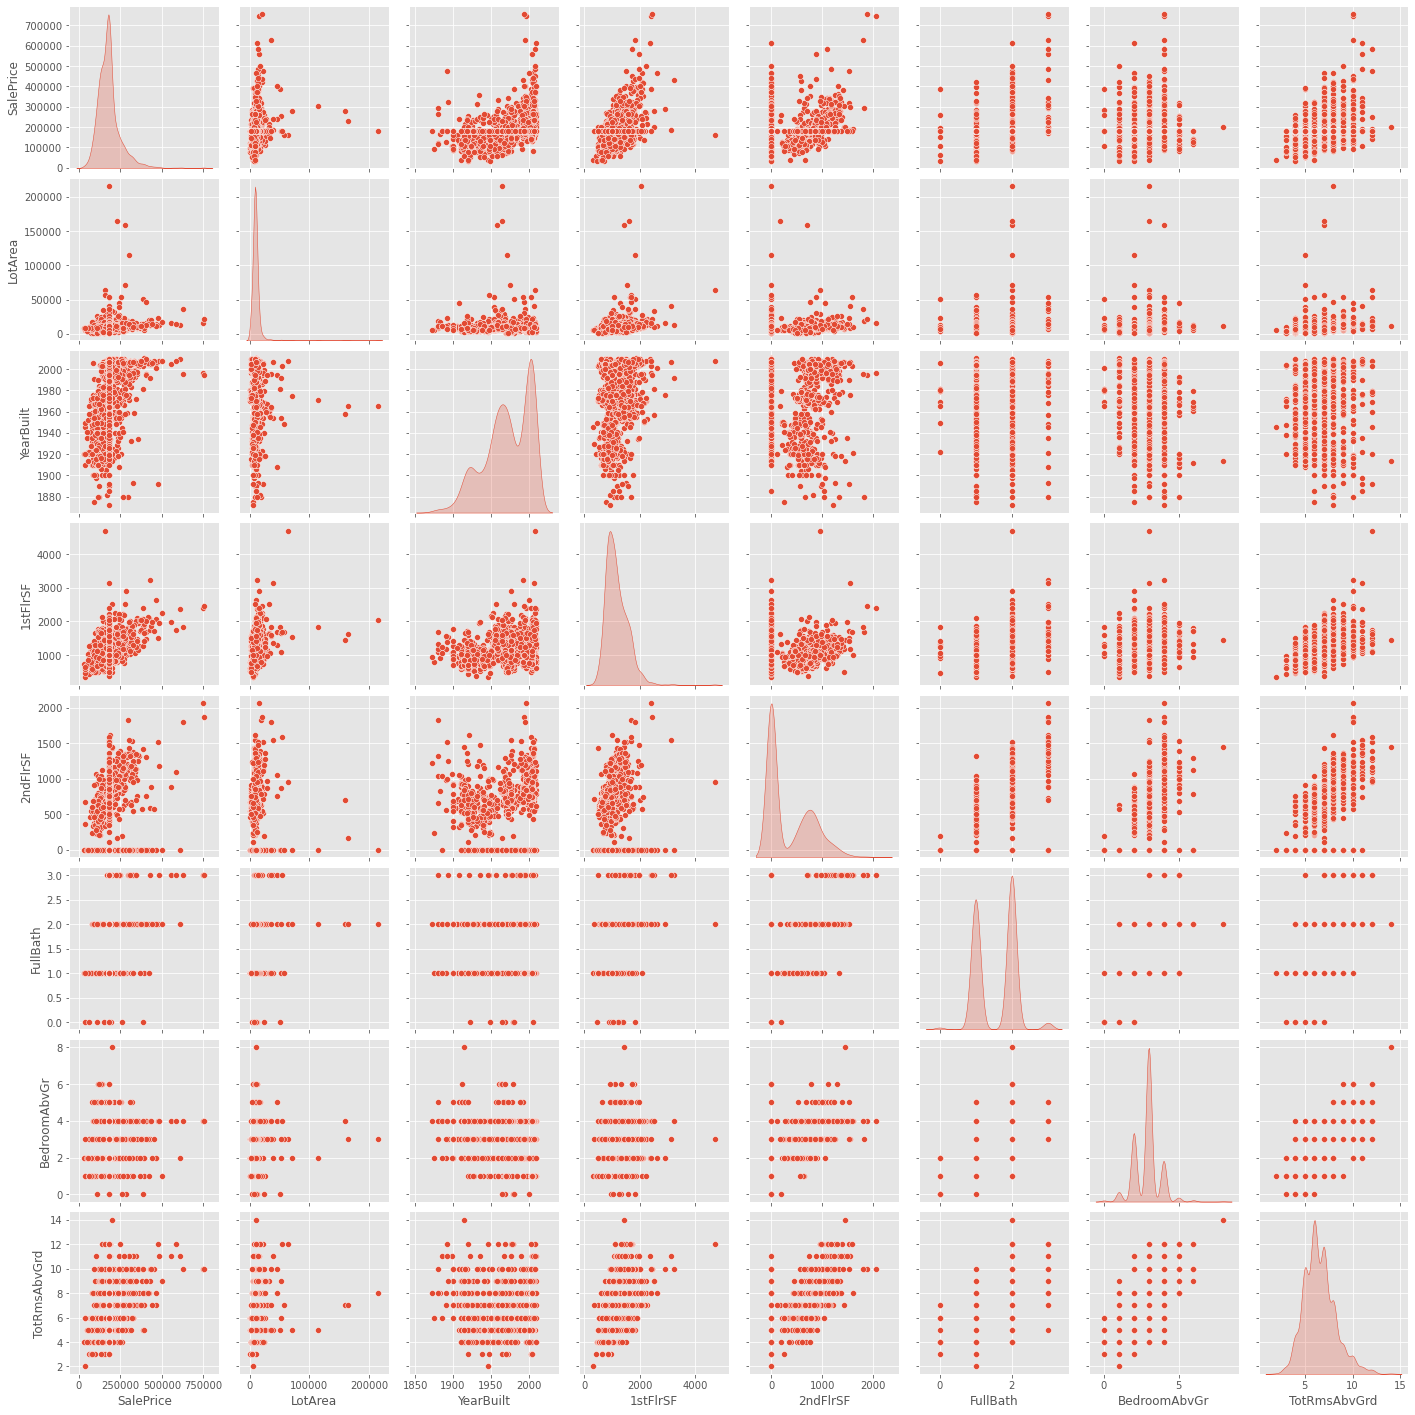

In [151]:
sns.pairplot(hpp_g[["SalePrice", "LotArea", "YearBuilt", "1stFlrSF", "2ndFlrSF", "FullBath", 
                "BedroomAbvGr", "TotRmsAbvGrd"]], diag_kind="kde")
plt.show()

# Processing the dataframe:-

In [24]:
x=hpp_g.copy()
x.drop('SalePrice',axis=1,inplace=True)
y=hpp_g['SalePrice']

Encoding Categorical Features

In [25]:
category=[i for i in hpp_g.columns if hpp_g[i].dtypes=='O']

In [26]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
encode=OrdinalEncoder()
labe=LabelEncoder()

In [27]:
for i in category:
    hpp_g[i]=encode.fit_transform(hpp_g[i].values.reshape(-1,1))
    
    y=labe.fit_transform(y)

In [28]:
hpp_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   float64
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   float64
 6   Alley          1460 non-null   float64
 7   LotShape       1460 non-null   float64
 8   LandContour    1460 non-null   float64
 9   Utilities      1460 non-null   float64
 10  LotConfig      1460 non-null   float64
 11  LandSlope      1460 non-null   float64
 12  Neighborhood   1460 non-null   float64
 13  Condition1     1460 non-null   float64
 14  Condition2     1460 non-null   float64
 15  BldgType       1460 non-null   float64
 16  HouseStyle     1460 non-null   float64
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Now, all the data types are converted into integer and float type.

Skewness:-

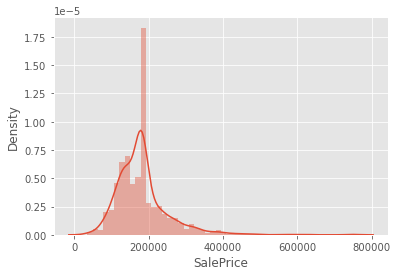

<Figure size 1440x1152 with 0 Axes>

In [15]:
sns.distplot(hpp_g['SalePrice'])
plt.figure(figsize=(20,16))
plt.show()

Above visualization shows that the is not normalized and highly skewed.
The building blocks is out of normalized curve.

Scaling of the data

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [30]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

PCA

In [31]:
from sklearn.decomposition import PCA
pca = PCA().fit(x)

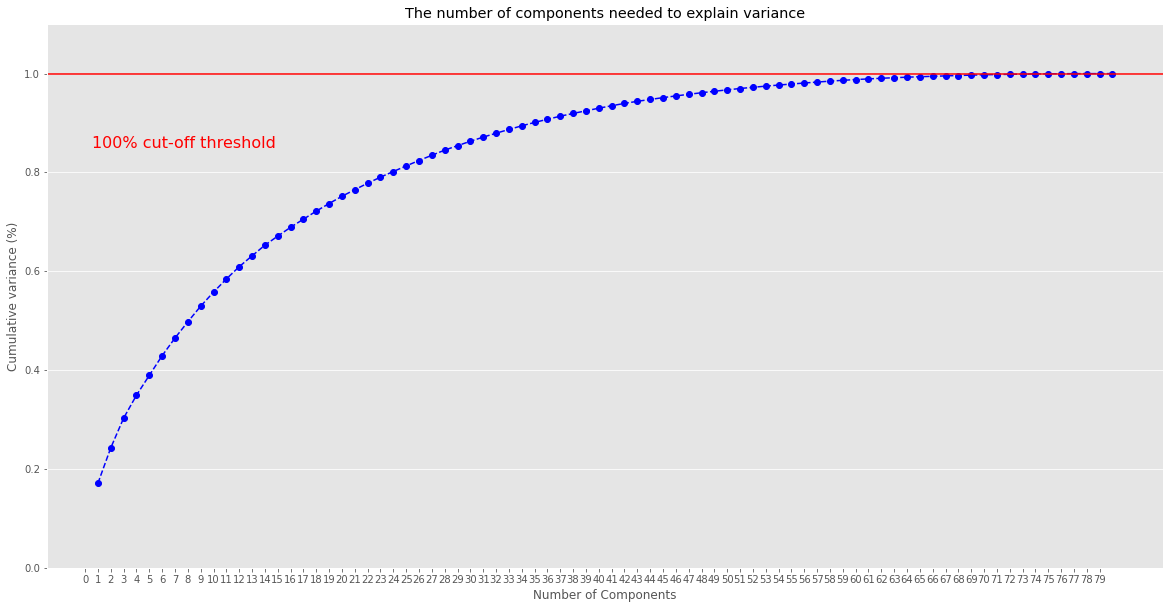

In [32]:
fig, ax = plt.subplots(figsize=(20,10))
xi = np.arange(1, 81, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 80, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=1, color='r', linestyle='-')
plt.text(0.5, 0.85, '100% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

We can clearly see that with 65 features all the information can be retained.

In [33]:
pca=PCA(n_components=65)
x=pca.fit_transform(x)
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-0.042233,0.605459,0.599093,0.414623,0.427811,-0.144379,-0.391045,0.599428,-0.433259,0.244862,...,-0.002126,-0.055332,-0.055466,0.005142,0.052034,-0.009730,-0.023496,-0.002783,0.001652,0.046493
1,0.339740,0.596729,0.005429,-0.682530,0.511325,0.013122,-0.128236,-0.517930,-0.045079,0.114372,...,0.173129,-0.092330,0.052063,-0.235971,-0.167340,-0.040565,-0.103325,0.236444,0.031266,0.052904
2,0.725837,0.738343,-0.074456,0.170791,0.068579,0.508436,-0.030087,-0.447718,-0.103697,-0.228638,...,-0.035556,-0.042724,-0.044300,0.004872,0.001794,0.037829,-0.020875,-0.038489,-0.004210,-0.006957
3,0.354066,0.452634,-0.068019,-0.325640,-0.066764,-0.680497,-0.487590,0.334949,0.172479,-0.047401,...,0.079098,0.053389,0.059231,-0.000251,0.047687,0.034473,0.065709,0.032931,0.012375,0.010740
4,0.585642,0.842007,0.107337,-0.097640,-0.290344,-0.433219,-0.233348,0.345106,0.222007,0.310815,...,-0.000014,0.038037,0.009602,0.010901,-0.008985,-0.006169,-0.018863,0.009879,0.017915,-0.047494


# Modelling Phase

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error as mse,mean_absolute_error as mae

In [35]:
# linear Regression;

lr=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    train_accuracy=r2_score(y_train,pred_train)
    test_accuracy=r2_score(y_test,pred_test)
    print("At random state train",{i},train_accuracy)
    print("At random state test",{i},test_accuracy)
    print("\n")
    print('Mean-squared-error: ',mse(y_test,pred_test))
    print('Mean-absolute-error: ',mae(y_test,pred_test))
    print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,pred_test)))
    print('R2 SCore: ',r2_score(y_test,pred_test))

At random state train {0} 0.6712733234549135
At random state test {0} 0.6304518253563376


Mean-squared-error:  2258060152.7359905
Mean-absolute-error:  28498.809330013268
Root-Mean-squared-error:  47519.0504191318
R2 SCore:  0.6304518253563376
At random state train {1} 0.6878046197912748
At random state test {1} 0.47021408350895577


Mean-squared-error:  2289926265.516169
Mean-absolute-error:  26414.13336621137
Root-Mean-squared-error:  47853.174038052784
R2 SCore:  0.47021408350895577
At random state train {2} 0.6841710684371238
At random state test {2} 0.5915213201544958


Mean-squared-error:  1878042058.7493148
Mean-absolute-error:  26432.66062302196
Root-Mean-squared-error:  43336.38262187229
R2 SCore:  0.5915213201544958
At random state train {3} 0.6904336120580408
At random state test {3} 0.44591344318695336


Mean-squared-error:  2668954774.301061
Mean-absolute-error:  26659.102583116855
Root-Mean-squared-error:  51661.92770601056
R2 SCore:  0.44591344318695336
At random state 

In [36]:
print('Best accuracy is ',0.729, 'on random_state',13)

Best accuracy is  0.729 on random_state 13


In [37]:
# Choosing the best random state in linear regression

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=13)

In [38]:
# Linear Regression;

lr=LinearRegression()

lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("R2 Score",r2_score(y_test,predlr)*100)
print('Mean-squared-error: ',mse(y_test,predlr))
print('Mean-absolute-error: ',mae(y_test,predlr))
print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,predlr)))

R2 Score 67.82210548654218
Mean-squared-error:  1375348817.5784118
Mean-absolute-error:  25032.758777054514
Root-Mean-squared-error:  37085.695592484335


In [39]:
#lassor regressoin;


from sklearn.linear_model import Lasso,Ridge
 
ls=Lasso(alpha=0.1)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
print("R2 Score",r2_score(y_test,pred_ls)*100)
print('Mean-squared-error: ',mse(y_test,pred_ls))
print('Mean-absolute-error: ',mae(y_test,pred_ls))
print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,pred_ls)))

R2 Score 67.82317826950725
Mean-squared-error:  1375302964.6472352
Mean-absolute-error:  25032.294822318978
Root-Mean-squared-error:  37085.07738494333


In [40]:
# Decision tree regressor;

from sklearn.tree import DecisionTreeRegressor
 
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
print("R2 Score",r2_score(y_test,pred_dtr)*100)
print('Mean-squared-error: ',mse(y_test,pred_dtr))
print('Mean-absolute-error: ',mae(y_test,pred_dtr))
print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,pred_dtr)))

R2 Score 0.21399766601833958
Mean-squared-error:  4265057188.981708
Mean-absolute-error:  42550.020917386
Root-Mean-squared-error:  65307.40531503076


In [41]:
# Random Forest Regressor;

from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("R2 Score",r2_score(y_test,predrf)*100)
print('Mean-squared-error: ',mse(y_test,predrf))
print('Mean-absolute-error: ',mae(y_test,predrf))
print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,predrf)))

R2 Score 62.76586754365472
Mean-squared-error:  1591462736.1953351
Mean-absolute-error:  27837.565991332798
Root-Mean-squared-error:  39893.141468118745


In [42]:
# Ada Boost Regressor;

from sklearn.ensemble import AdaBoostRegressor

ad=AdaBoostRegressor(n_estimators=100)
ad.fit(x_train,y_train)
pred_ad=ad.predict(x_test)
print("R2 Score",r2_score(y_test,pred_ad)*100)
print('Mean-squared-error: ',mse(y_test,pred_ad))
print('Mean-absolute-error: ',mae(y_test,pred_ad))
print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,pred_ad)))

R2 Score 49.33669743103768
Mean-squared-error:  2165452846.94427
Mean-absolute-error:  35437.04874542001
Root-Mean-squared-error:  46534.42647056338


Therefore, Lasso Regression shows the metrics results among other models.

In [43]:
# Cross Validation for linear regression;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(lr,x,y,cv=9)
print('Cross validation score of Linear Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("R2 Score",r2_score(y_test,predlr)*100)

Cross validation score of Linear Regression model: [ 7.55792325e-01  7.52938412e-01  7.09240631e-01  4.22065235e-01
  8.01319092e-01  7.77801454e-01  7.48401126e-01 -1.54835808e+00
 -5.83024782e+30]
Mean of Cross validation score: -6.478053129187693e+29
R2 Score 67.82210548654218


In [44]:
# Cross Validation for lasso regression;

cv_score=cross_val_score(ls,x,y,cv=9)
print('Cross validation support vector Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("R2 Score",r2_score(y_test,pred_ls)*100)

Cross validation support vector Regression model: [ 7.55792741e-01  7.52943649e-01  7.09269255e-01  4.22205591e-01
  8.01305354e-01  7.77805729e-01  7.48408336e-01 -1.54817886e+00
 -5.82993249e+30]
Mean of Cross validation score: -6.477702767118752e+29
R2 Score 67.82317826950725


In [45]:
# Cross Validation for decision tree regression;

cv_score=cross_val_score(dtr,x,y,cv=9)
print('Cross validation score of decision tree Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("R2 Score",r2_score(y_test,pred_dtr)*100)

Cross validation score of decision tree Regression model: [ 2.88318605e-01  2.38679306e-01  4.18472324e-01 -1.35094679e-01
  4.60489699e-01  5.43591874e-01  5.19885059e-01 -3.09287609e+00
 -6.15118074e+30]
Mean of Cross validation score: -6.834645265794493e+29
R2 Score 0.21399766601833958


In [46]:
# Cross Validation for random forest regression;

cv_score=cross_val_score(rf,x,y,cv=9)
print('Cross validation score of random forest Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("R2 Score",r2_score(y_test,predrf)*100)

Cross validation score of random forest Regression model: [ 6.55614247e-01  6.84948096e-01  6.70172094e-01  5.48878764e-01
  7.31231501e-01  7.48582054e-01  6.47627071e-01 -9.27078165e-01
 -5.41463371e+30]
Mean of Cross validation score: -6.016259678727196e+29
R2 Score 62.76586754365472


In [47]:
# Cross Validation for AdaBoost regression;

cv_score=cross_val_score(ad,x,y,cv=9)
print('Cross validation score of AdaBoost Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("R2 Score",r2_score(y_test,pred_ad)*100)

Cross validation score of AdaBoost Regression model: [ 5.69174083e-01  5.81253690e-01  5.88813999e-01  3.91837179e-01
  6.66828389e-01  4.97912758e-01  5.15340310e-01 -8.99245430e-01
 -5.04892800e+30]
Mean of Cross validation score: -5.609919998044538e+29
R2 Score 49.33669743103768


Therefore the difference between cv score and r2 score is less in case of Lasso Regression that is [0.678-0.422=0.256],So we will choose this model for further process.

# Hyperparameter Tuning:-

In [49]:
Lasso()

Lasso()

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

parameters={'alpha':[0.001,0.01,0.1,1.0],
            'selection':['cyclic', 'random'],
            'random_state':[None,'int'],
            'max_iter':[100,500,1000]}

ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1.0, 'max_iter': 100, 'random_state': None, 'selection': 'cyclic'}


# Finalizing the best Model

In [52]:
ls=Lasso(alpha=1.0,selection='cyclic',random_state=None,max_iter=100)
ls.fit(x_train,y_train)
train_r2=ls.score(x_train,y_train)
pred_decision=ls.predict(x_test)
print(train_r2)
ls2=r2_score(y_test,pred_decision)
print('R2_Score',ls2)
lss=cross_val_score(ls,x,y,cv=4)
lsc=ls.score(x_train,y_train)
print('Cross_Val_Score',lsc*100)

0.6654205689713149
R2_Score 0.6783271989331372
Cross_Val_Score 66.54205689713149


So, we are getting our model accuracy(R2 Score) 68% with 
almost same cross validation score in our model means that our model is working well.

# Saving the Model

In [53]:
import pickle
filename='Housing_Price_Pred.pkl'
pickle.dump(ls,open(filename,'wb'))

# Conclusion:-

In [54]:
loaded_model=pickle.load(open('Housing_Price_Pred.pkl','rb'))

In [55]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],
                        index=['Predicted Pricing','Actual Pricing'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,282,283,284,285,286,287,288,289,290,291
Predicted Pricing,221700.747712,215578.645999,131332.194235,135533.397301,188460.082935,123337.329594,175728.171706,206355.420737,287769.543746,105275.028415,...,126758.476253,196522.280285,289663.592167,161068.039793,179391.831164,149159.934598,276972.862007,266642.725726,132946.05547,257778.004763
Actual Pricing,221700.747712,215578.645999,131332.194235,135533.397301,188460.082935,123337.329594,175728.171706,206355.420737,287769.543746,105275.028415,...,126758.476253,196522.280285,289663.592167,161068.039793,179391.831164,149159.934598,276972.862007,266642.725726,132946.05547,257778.004763


In [56]:
conclusion.transpose()

,Predicted Pricing,Actual Pricing
0,221700.747712,221700.747712
1,215578.645999,215578.645999
2,131332.194235,131332.194235
3,135533.397301,135533.397301
4,188460.082935,188460.082935
...,...,...
287,149159.934598,149159.934598
288,276972.862007,276972.862007
289,266642.725726,266642.725726
290,132946.055470,132946.055470


# Insights:-

The results of this study suggest following outputs which might be useful for House Sellers to extend their business:
    
    
1. Before selling and purchasing a house one should be well aware on some major factors that plays a vital role. because a
   house is something which decides one's property standard and many more things. One must focus on 'Property/House Price',
   'Land Record', type of 'Location' on which the house has built,'Financing Banks','Age of the house', 'Size' ,'No.of rooms',
   'No. of Bathrooms','Floors' and 'Maintenance Mode' etc.. are very much important to look on. The location of the home within
   the neighborhood is also important to many people. Some people prefer a lot near the main entry, while others like to be 
   away from traffic andfurther into the development.
        
     
2. Data Analysis shows that The cheapest house sold for $34,900 and the most expensive for $755,000. Whereas, the average 
   sales price is $181,477. Maximum number of houses are sold in the month of june and july. The location of the house is 
   excepted to play a key role in determining house prices, a good chunks of houses are in 'North Ames','Collect Creek' and 
   'Old Town' with few houses in 'Bluestern','Northpark Villa' and 'Veenker'. All these areas involves public facilities
   such as 'Schools' and 'Hospitals' which results in increasing of house prices.